Python Project - Marvel Mart Project   
Joshua Jayandran   
3/12/2021

In [2]:
#importing necessary libraries
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [3]:
#reading the csv file into pandas
df = pd.read_csv('MM_Sales.csv',error_bad_lines = False)
df.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,Sub-Saharan Africa,Namibia,Household,Offline,M,8/31/15,897751939,10/12/15,3604,668.270,502.540,2408445.080,1811154.160,597290.920,nan,nan,nan
1,Europe,Iceland,Baby Food,Offline,L,11/20/10,599480426,1/9/11,8435,255.280,159.420,2153286.800,1344707.700,808579.100,nan,nan,nan
2,Europe,Russia,Meat,Online,L,6/22/17,538911855,6/25/17,4848,421.890,364.690,2045322.720,1768017.120,277305.600,nan,nan,nan
3,Europe,Moldova,Meat,Online,L,2/28/12,459845054,3/20/12,7225,421.890,364.690,3048155.250,2634885.250,413270.000,nan,nan,nan
4,Europe,Malta,Cereal,Online,H,8/12/10,626391351,9/13/10,1975,205.700,117.110,406257.500,231292.250,174965.250,nan,nan,nan


In [50]:
#Removing three extra nan columns
df.drop(columns = ['Unnamed: 14', 'Unnamed: 15','Unnamed: 16'],axis=1,inplace=True)
df.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Sub-Saharan Africa,Namibia,Household,Offline,M,8/31/15,897751939,10/12/15,3604,668.270,502.540,2408445.080,1811154.160,597290.920
1,Europe,Iceland,Baby Food,Offline,L,11/20/10,599480426,1/9/11,8435,255.280,159.420,2153286.800,1344707.700,808579.100
2,Europe,Russia,Meat,Online,L,6/22/17,538911855,6/25/17,4848,421.890,364.690,2045322.720,1768017.120,277305.600
3,Europe,Moldova,Meat,Online,L,2/28/12,459845054,3/20/12,7225,421.890,364.690,3048155.250,2634885.250,413270.000
4,Europe,Malta,Cereal,Online,H,8/12/10,626391351,9/13/10,1975,205.700,117.110,406257.500,231292.250,174965.250


Part 1 : Cleaning Data

In [51]:
#Checking for null values in all columns
df.isnull().sum()

Region             0
Country            0
Item Type          6
Sales Channel      0
Order Priority    15
Order Date         0
Order ID           0
Ship Date          0
Units Sold         0
Unit Price         0
Unit Cost          0
Total Revenue      0
Total Cost         0
Total Profit       0
dtype: int64

In [52]:
#Changing the number values in Country column to null
a = df.query('Country == "437.2"').index
df['Country'].iloc[a] = "NULL"
b = df.query('Country == "651.21"').index
df['Country'].iloc[b] = "NULL"
c = df.query('Country == "154.06"').index
df['Country'].iloc[c] = "NULL"

In [53]:
#Fill mising values In Item Type column by NULL
df['Item Type'].fillna('NULL',inplace=True)

In [54]:
#Fill mising values In Order Priority column by NULL
df['Order Priority'].fillna('NULL',inplace=True)

In [55]:
#repalcing the non-numeric values to 0 in Order Id column
ind = df[df["Order ID"] == 'Fruits'].index
df["Order ID"].iloc[ind] = 0
ind = df[df["Order ID"] == 'Snacks'].index
df["Order ID"].iloc[ind] = 0
ind = df[df["Order ID"] == 'Meat'].index
df["Order ID"].iloc[ind] = 0

In [56]:
#Removing all the rows that have been altered
df = df[(df["Item Type"] != "NULL")&(df['Order ID'] != 0) & (df['Country'] != "NULL")&(df['Order Priority'] != "NULL")]

In [57]:
#Saving the cleaned data into MM_Sales_clean.csv
df.to_csv('MM_Sales_clean.csv')

Part2 : General Statistics

1 (A): Bar Chart for top 10 Countries with most sales

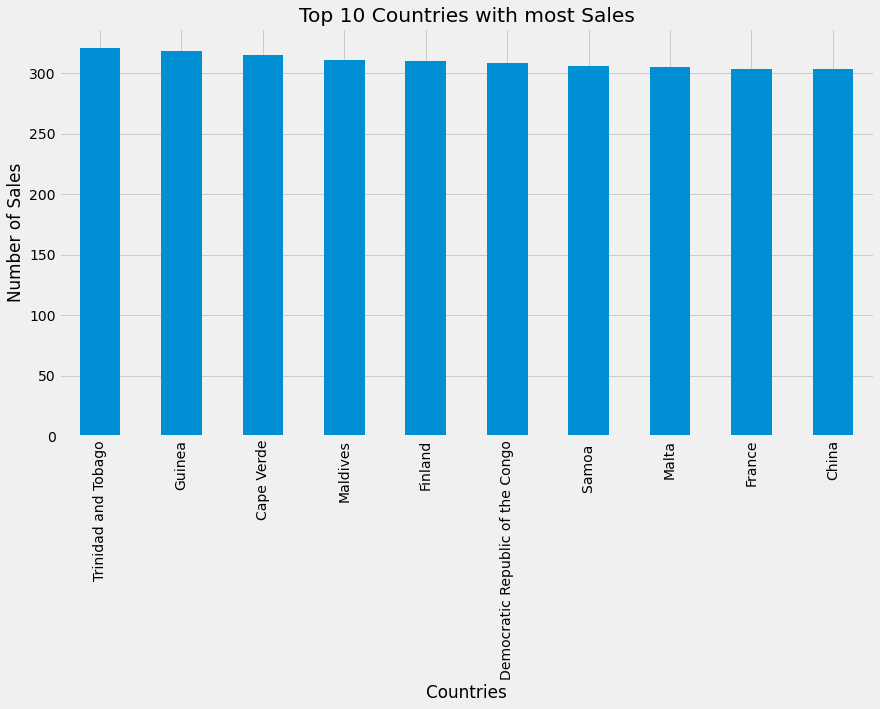

In [6]:
df['Country'].value_counts().sort_values(ascending = False)[:10].plot(kind = 'bar', figsize=(13,7))
plt.title("Top 10 Countries with most Sales")
plt.savefig("Top_10_Countries_pie.png")
plt.xlabel('Countries')
plt.ylabel('Number of Sales')
plt.show()

From above chart it is clear that we have most number of sales in Guinea, Cape Verde and Democratic Republic of the Congo and we have already shipping center in Guinea, so we should build a shipping center in either Cape Verde or Democratic Republic of the Congo because we have most number of sales in these two countries after Guinea where we already have a shipping center. The reason behind suggesting these countries is we can generate more revnues by build shipping center in these countries.

1 (B): save the results to a text file called MM_Rankings.txt.

In [59]:
file = open("MM_Rankings.txt", "a")
countries  = df['Country'].value_counts().sort_values(ascending = False)[:10]
file.write("Countries Most Sale Transactions:\n")
for country in countries.index:
  # write line to output file
    file.write(country+" : "+str(countries[country]))
    file.write("\n")
file.write("... (Answer question) The country we should build our shipping center is "+countries.index[1]+" because we have most number of sales in this country\n\n")
file.close()

2 (A) Count of online and offline orders that our company takes

In [60]:
pd.DataFrame(df['Sales Channel'].value_counts())

,Sales Channel
Online,30183
Offline,19789


2 (B): Count of Orders by Order priority types

In [61]:
pd.DataFrame(df['Order Priority'].value_counts())

,Order Priority
M,19881
H,15095
L,9984
C,5012


2 (C): Pie chart of distribution of online and offline orders

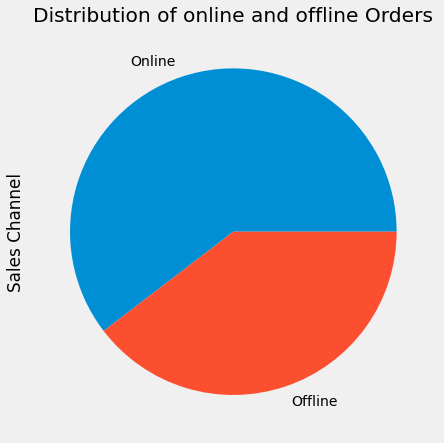

In [62]:
df['Sales Channel'].value_counts().plot(kind='pie',figsize=(13,7))
plt.title("Distribution of online and offline Orders")
plt.show()

2 (C): Pie chart of different order priority types

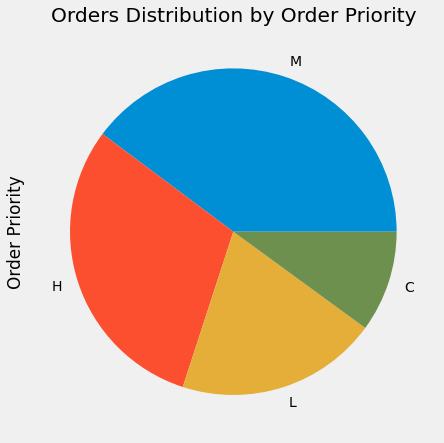

In [63]:
df['Order Priority'].value_counts().plot(kind = 'pie',figsize=(13,7))
plt.title('Orders Distribution by Order Priority')
plt.show()

2 (D): Add the results of the highest sales channel type and the highest order priority to the file MM_Rankings.txt.

In [64]:
#Writing the Sales Channel data into MM_Ranking.txt
sales = df['Sales Channel'].value_counts()
file = open("MM_Rankings.txt", "a")
file.write("Sales Channels:\n")
for sale in sales.index:
    file.write(sale+" : "+str(sales[sale])+"\n")
file.write("We do more online/offline sales.\n\n")

file.close()

In [65]:
#Writing the Order Priority data into MM_Ranking.txt
orders = df['Order Priority'].value_counts()
file = open("MM_Rankings.txt", "a")
file.write("Order Priorities:\n")
for order in orders.index:
    file.write(order+" : "+str(orders[order])+"\n")
file.write("We do more M/H/L/C order priorities.\n\n")

file.close()

3 (A): Create a Boxplot using Seaborn showing the Total Profits DISTRIBUTION by Item Type.

<Figure size 432x288 with 0 Axes>

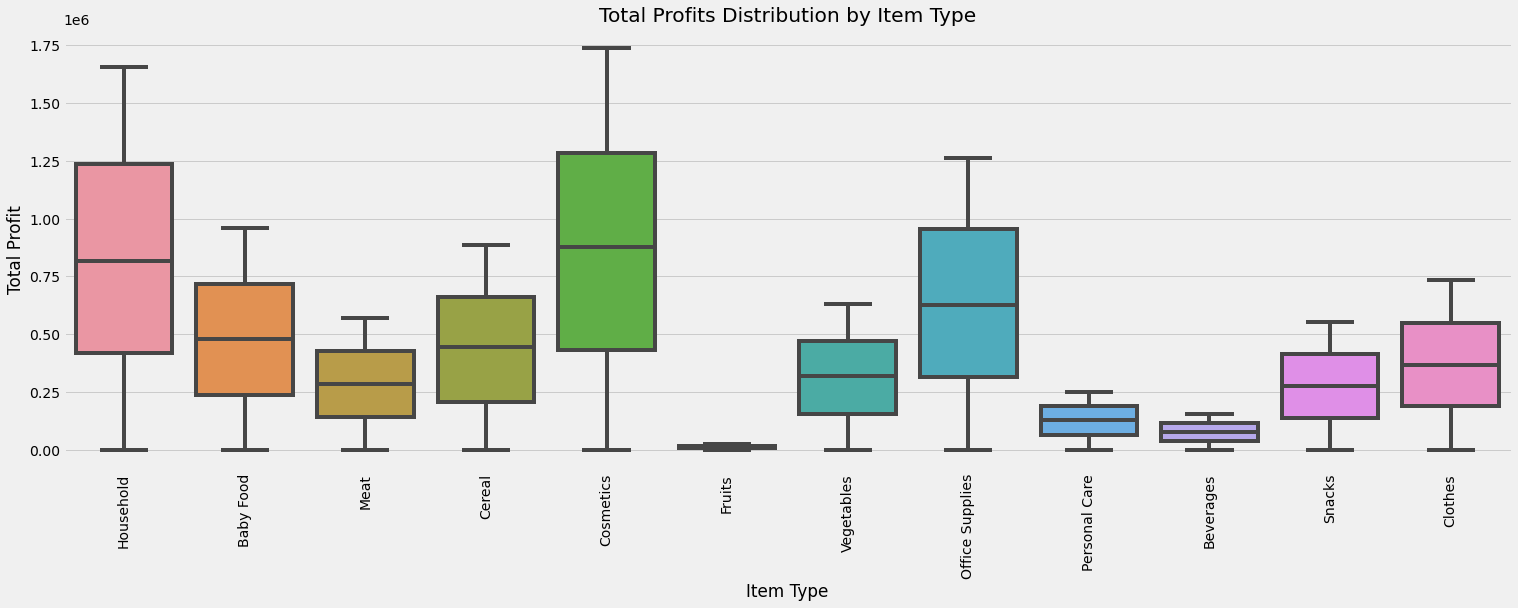

In [66]:
plt.figure()
sns.catplot(x="Item Type", y="Total Profit", kind="box", data=df,height = 7,aspect = 3)
plt.title("Total Profits Distribution by Item Type")
plt.xticks(rotation = 90)
plt.show()

3 (B):Use Python to determine the sum of Total Profit by Item Type.

In [67]:
df.groupby('Item Type',as_index = False)['Total Profit'].sum().sort_values(by = 'Total Profit',ascending = False)

,Item Type,Total Profit
4,Cosmetics,3638645299.300
6,Household,3401180998.060
8,Office Supplies,2605440187.500
0,Baby Food,1942865748.120
2,Cereal,1824726412.290
3,Clothes,1520832019.680
11,Vegetables,1322639660.240
7,Meat,1196342404.400
10,Snacks,1149715758.720
9,Personal Care,535250525.600


3 (C): Now create a chart type of your choice (Seaborn or Matplotlib) showing the sums of the different Item Types.

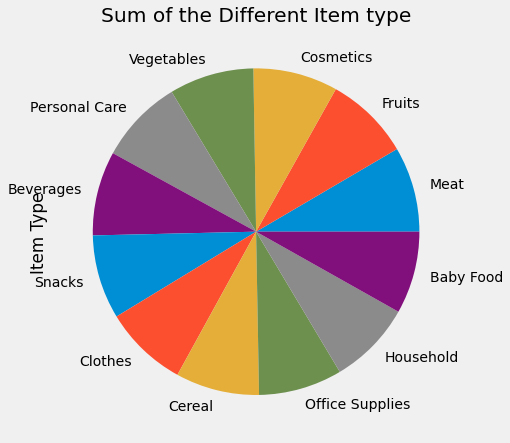

In [68]:
df["Item Type"].value_counts().plot(kind = 'pie',figsize = (13,7))
plt.title("Sum of the Different Item type")
plt.show()

3 (D): Now, using Python, rank the top 3 item types we did the most sales (brought in most profit) in to the least sales. (Use 'Total Profit' to determine this). Please list the item types and the amount sold.

In [69]:
df.groupby('Item Type',as_index = False)['Total Profit'].sum().sort_values(by = 'Total Profit',ascending = False)[:3]

,Item Type,Total Profit
4,Cosmetics,3638645299.300
6,Household,3401180998.060
8,Office Supplies,2605440187.500


3 (E): Writing the top 3 items with most profit into file

In [70]:
file = open("MM_Rankings.txt", "a")
file.write("Highest Selling Items:\n")
items_profit = df.groupby('Item Type')['Total Profit'].sum().sort_values(ascending = False)[:3]
for item in items_profit.index:
    file.write(item+" : "+str(items_profit[item])+"\n")
file.write("We sold "+items_profit.index[1]+" most\n")

file.close()

Part 3 (F) Provide a markdown section discussing the results of the boxplots. Discuss what is being shown in the boxplots and do some business analytics around what sort of use this sort of chart might help in making decisions. Are there any unexpected
results? Discuss them.<br>
Box plot represents distribution of numerical data and skewness through displaying the data in quartiles (or percentiles) and averages.
We produced the boxplot of Total Profit Distribution by Item Type. This plot reprsents the amount of profit produced by each type of items. From the plot we observed that the top 5 items which produced most of the profit are Cosmetics, Household, Office Supplies, Baby Food, and Cereal respectively. The least profit is produced by Fruits.
In our case boxplot helps us to check the distribution of the Total Profit by each item type even we can visualize the distribution of the other numerical columns like Total Revenue, Total Cost by item type or Order priority type so we can understand that from where the most profits are produced and where we are investing most.

4 (A): Sum for Units Sold, Unit Cost, Total Revenue, Total Cost and Total Profit

In [71]:
summary_sum = df[['Units Sold','Unit Cost','Total Revenue','Total Cost','Total Profit']].sum()
summary_sum

Units Sold        249819515.000
Unit Cost           9361031.650
Total Revenue   66145601195.170
Total Cost      46629392361.260
Total Profit    19516208833.910
dtype: float64

4 (B): Mean values for Units Sold, Unit Cost, Total Revenue, Total Cost and Total Profit

In [72]:
summary_mean = df[['Units Sold','Unit Cost','Total Revenue','Total Cost','Total Profit']].mean()
summary_mean

Units Sold         4999.190
Unit Cost           187.326
Total Revenue   1323653.270
Total Cost       933110.389
Total Profit     390542.881
dtype: float64

4 (C): Max values for Units Sold, Unit Cost, Total Revenue, Total Cost and Total Profit

In [73]:
summary_max = df[['Units Sold','Unit Cost','Total Revenue','Total Cost','Total Profit']].max()
summary_max

Units Sold        10000.000
Unit Cost           524.960
Total Revenue   6682031.730
Total Cost      5249075.040
Total Profit    1738178.390
dtype: float64

4 (D): Line Plot for Sum of the specified columns

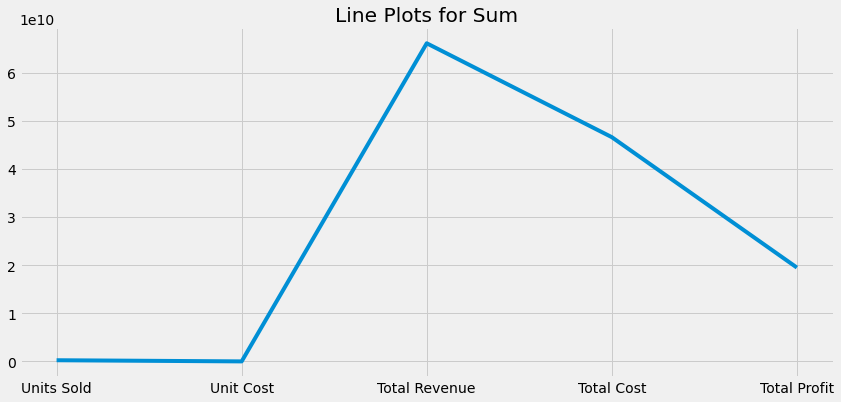

In [74]:
plt.figure(figsize=(13,6))
plt.plot(summary_sum)
plt.title("Line Plots for Sum")
plt.show()

4 (D): Line plots For Mean and Maxium values

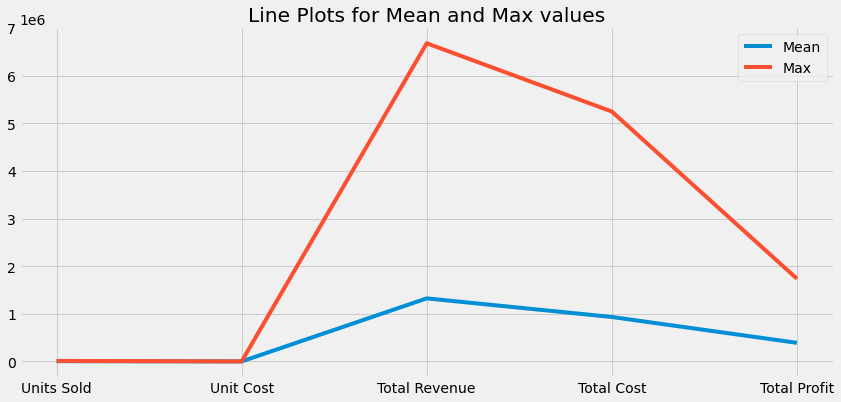

In [75]:
plt.figure(figsize=(13,6))
plt.plot(summary_mean)
plt.plot(summary_max)
plt.title("Line Plots for Mean and Max values")
plt.legend(['Mean','Max'])
plt.show()

In [76]:
summary_sum.index

Index(['Units Sold', 'Unit Cost', 'Total Revenue', 'Total Cost',
       'Total Profit'],
      dtype='object')

4 (E): Save these calculations below to a text file called MM_Calc.txt

In [77]:
# Writing Sum data into MM_Calc.txt
file = open("MM_Calc.txt", "a")
file.write("Sums:\n")
for item in summary_sum.index:
    file.write(item+" : "+str(summary_sum[item])+"\n")
file.write("\n")
# Writing Mean data into MM_Calc.txt
file.write("Averages:\n")
for item in summary_mean.index:
    file.write(item+" : "+str(summary_mean[item])+"\n")
file.write("\n")
# Writing Maximum data into MM_Calc.txt
file.write("Maximums:\n")
for item in summary_max.index:
    file.write(item+" : "+str(summary_mean[item])+"\n")
file.write("\n")
file.close()

Part 3: Cross-Reference Statistics

In [78]:
#creating region dataframe by grouping the data by Region 
region = df.groupby('Region')['Country'].unique()

In [79]:
#creating dictionary with region as key and list of countries of that region as values
dic = {}
for i in region.index:
    dic[i] = region[i]

In [80]:
#creating the dataframe df2 by dic
df2 = pd.DataFrame(dic.values()).T
df2.columns = list(dic.keys())

In [81]:
df2.to_csv("Countries_By_Region.csv")